# PRIMER PARCIAL SIS420 

# Regresión Logística Binari

## Implementacion del modelo de regresion logistica para realizar predicciones.

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

Nuestro objetuvo es predecir si una persona tiene o no el Cardiovascular.
En el siguiente dataset `cardio_train` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection?select=cardio_train.csv

Enlace del GitHub: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Parciales/Primer%20Parcial


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Importamos las librerias

# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## **Información del Dataset**


Acerca del conjunto de datos

Detección de enfermedades cardiovasculares

Cita:

Licencia: Desconocida

Dominio: Público

Propietario del conjunto de datos: Svetlana Ulianova

Fecha de creación: 2019-01-20


## Características:


Edad | Característica de objetivo | Edad | int (días)

Altura | Característica de objetivo | Altura | int (cm) |

Peso | Característica de objetivo | Peso | flotador (kg) |

Género | Característica de objetivo | Género | Código categórico |

Presión arterial sistólica | Función de examen | ap_hi | int |

Presión arterial diastólica | Función de examen | ap_lo | int |

Colesterol | Función de examen | Colesterol | 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal |

Glucosa | Función de examen | gluc | 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal |

Fumar | Característica subjetiva | Humo | binario |

Consumo de alcohol | Característica subjetiva | ALCO | binario |

Actividad física | Característica subjetiva | Activo | binario |

Presencia o ausencia de enfermedad cardiovascular | Variable objetivo | Cardio | binario |

Todos los valores del conjunto de datos se recogieron en el momento del examen médico.


## El enunciado del problema:

Construir una aplicación para clasificar a los pacientes como sanos o que sufren de enfermedades cardiovasculares en función de los atributos dados.

In [2]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
data = pd.read_csv('./cardio_train.csv', delimiter=';')

# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# PROCESAMIENTO DE LOS DATASET

In [3]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

DATOS VACIOS
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke         

Eliminamos las columnas que no son necesarias para el modelamiento

In [4]:
# En este caso eliminamos la columna ID
data.drop(['id'], axis=1, inplace=True)

### Una vez procesado el dataset lo mostramos y aplicamos el modelo

In [5]:
# mostramos el dataset procesado
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [38]:
# Mostramos información 
data.shape

(69301, 12)

# Implementación

# Regresión Logistica Binaria

In [24]:
# Leemos los datos del dataset

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba 
X_test = test_data.drop(['cardio'], axis=1)
y_test = test_data['cardio']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['cardio'], axis=1)
y_train = train_data['cardio']
m_train = len(y_train)


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
20241  17230       1     153   115.0    120     80            3     3      0   
36773  20257       1     166   103.0    140     90            3     3      0   
39989  18885       1     162    91.0    150     90            1     1      0   
59583  20306       1     160    62.0    130     90            1     1      0   
67792  21987       1     168    72.0    120     80            3     3      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
37194  21891       1     155    79.0    120     80            1     1      0   
6265   18280       1     155   105.0    120     80            1     1      0   
54886  23260       1     158    68.0    130     80            1     1      0   
860    17317       2     165    70.0    160     90            1     1      0   
15795  16846       1     168    69.0    130     80            1     1      0   

       alco  active  

In [25]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
20241,17230,1,153,115.0,120,80,3,3,0,0,1
36773,20257,1,166,103.0,140,90,3,3,0,0,1
39989,18885,1,162,91.0,150,90,1,1,0,0,0
59583,20306,1,160,62.0,130,90,1,1,0,0,0
67792,21987,1,168,72.0,120,80,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37194,21891,1,155,79.0,120,80,1,1,0,0,1
6265,18280,1,155,105.0,120,80,1,1,0,0,0
54886,23260,1,158,68.0,130,80,1,1,0,0,1
860,17317,2,165,70.0,160,90,1,1,0,0,1


### Si es mas posible podemos visualizar los omportamientos de los datos en una grafica

## 1.1 **Visualizar los datos en la gráfica**

In [26]:
import matplotlib.pyplot as plt

def plotData(X, y):
  # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
  # o para los negativos.

  # Crear una nueva figura
  fig = plt.figure()

  # Encontrar indices de positivos y negativos
  pos = y == 1
  neg = y == 0

  plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
  plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


# **1.2 IMPLEMENTACIÓN**

## **1.2.1 Normalización de los datos:**

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [27]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [28]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_train_norm, mu, sigma = featureNormalize(X_train)

# Mostramos los datos ya normalizados
X_train_norm

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
20241,-0.903802,-0.733043,-1.383913,2.837900,-0.059603,-0.094061,2.406517,3.103155,-0.31186,-0.238634,0.494978
36773,0.322579,-0.733043,0.199379,2.003259,0.078345,-0.034559,2.406517,3.103155,-0.31186,-0.238634,0.494978
39989,-0.233283,-0.733043,-0.287788,1.168619,0.147319,-0.034559,-0.537897,-0.394815,-0.31186,-0.238634,-2.020291
59583,0.342431,-0.733043,-0.531371,-0.848427,0.009371,-0.034559,-0.537897,-0.394815,-0.31186,-0.238634,-2.020291
67792,1.023483,-0.733043,0.442962,-0.152894,-0.059603,-0.094061,2.406517,3.103155,-0.31186,-0.238634,-2.020291
...,...,...,...,...,...,...,...,...,...,...,...
37194,0.984589,-0.733043,-1.140330,0.333979,-0.059603,-0.094061,-0.537897,-0.394815,-0.31186,-0.238634,0.494978
6265,-0.478397,-0.733043,-1.140330,2.142366,-0.059603,-0.094061,-0.537897,-0.394815,-0.31186,-0.238634,-2.020291
54886,1.539236,-0.733043,-0.774955,-0.431107,0.009371,-0.094061,-0.537897,-0.394815,-0.31186,-0.238634,0.494978
860,-0.868554,1.364176,0.077587,-0.292001,0.216294,-0.034559,-0.537897,-0.394815,-0.31186,-0.238634,0.494978


#### Despues de normalizar los datos el siguiente procedimiento es añadir la columna de unos (1) para los thetas 0, esto para que  todos los valores estén en un rango entre -1 y 1.

In [29]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m, n = X_train.shape

# Agraga el termino de intercepción a A
X_train_ready = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

# Mostramos los datos con la columna de unos
X_train_ready

array([[ 1.        , -0.90380193, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        ,  0.32257868, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        , -0.2332833 , -0.7330432 , ..., -0.31186032,
        -0.23863407, -2.0202912 ],
       ...,
       [ 1.        ,  1.53923574, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        , -0.86855412,  1.36417608, ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        , -1.05937845, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815]])

### **1.3 FUNCIÓN SIGMOIDEA**

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1.
Donde z es la theta transpuesta por X, que es nuestra hipótesis. Esta funcion nos permite predecir valores entre 1 y 0 para ver en que estado se encuentra. En este caso si una persona tiene enfermedad cardiovascular.

In [30]:
# Defenimos la función sigmoidea o funcion logistica que calcula la hipotesis ho(x)
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [31]:
print(sigmoid(0))


# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

0.5
g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


## **1.2 FUNCIÓN DE COSTO Y GRADIENTE**

Se implementa la funcion cost y gradient, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

## **Cálculo del costo  J(θ)**

In [32]:
# La funcion de costo en una regresión logistica es:
def calcularCosto(theta, X, y):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))

  J = - (1 / m) * np.sum(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))

  return J

## Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la **sigmoid()**

In [33]:
# Defenimos la funcion del Descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
  m = y.shape[0]

  # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    h = sigmoid(X.dot(theta.T))
    theta = theta - (alpha / m) * (h - y).dot(X)

    J_history.append(calcularCosto(theta, X, y))
    
  return theta, J_history

##### Probamos con algunos alternativas, donde los thetas se inicializan con Cero (0) y con una taza de aprendizaje alpha por lo que hacemos pruebas con diferentes valores.

In [49]:
# Antes verificamos el tamaño del tadaset para incluir la cantidad de thetas como parámetros
X_train_ready.shape

(55440, 12)

thetas calculados por el descenso por el gradiente: [ 0.0158874   0.43289438  0.0256476  -0.07331581  0.34514035  0.33445014
  0.22005444  0.39125767 -0.04511455 -0.02678447 -0.03371679 -0.07126979]
Con un costo de: 0.6228493485518235 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


Text(0, 0.5, 'Resultado')

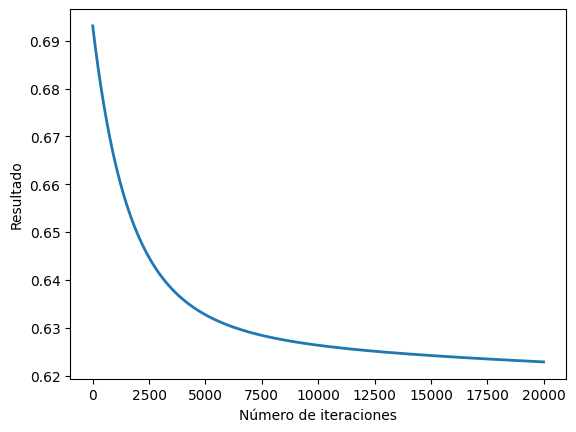

In [46]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 20000
# lambda_reg = 0.01

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X_train_ready, y_train, alpha, num_iters)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente: {:s}'.format(str(theta)))
print('=' * 100)

#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_history[-1]} ")
print('=' * 100)


print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado de los partidos
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')

Realizando algunas pruebas de que el equipo gana o no en un partido de local.

In [35]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array_reg = [1, 17230, 1,	153, 115.0,	120,	80,	3,	3,	0,	0,	1]
resuldato = sigmoid(np.dot(X_array_reg, theta))   # Se debe cambiar esto

print(f"Una persona con los siguientes datos: {X_array_reg}")
print('La persona tiene una probabilidad de que tenga la enfermendad cardiovascular de: {:.0f}'.format(resuldato))

Una persona con los siguientes datos: [1, 17230, 1, 153, 115.0, 120, 80, 3, 3, 0, 0, 1]
La persona tiene una probabilidad de que tenga la enfermendad cardiovascular de: 1


## Ejemplos de Predicciones

In [36]:
# Podemos hacer predicciones con varios ejemplos, en este caso 14 ejemplos donde se harán la
# predicciones correspondientes

X_columnas = ['age', 'gender',	'height', 'weight',	'ap_hi'	,'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active', 'cardio',	'cardio(Si/No)']

matriz_datos = np.array([
    [20305,	2,	159,	58.0,	160,	90,	1,	1,	1,	1,	1],
    [21721,	1,	160,	98.0,	120,	80,	1,	1,	0,	0,	1],
    [19998,	1,	168,	76.0,	160,	80,	1,	1,	0,	0,	1],
    [21711,	1,	157,	98.0,	130,	90,	1,	1,	0,	0,	1],
    [18309,	1,	163,	108.0,	150,	90,	1,	1,	0,	0,	1],
    [15353,	1,	169,	67.0,	120,	70,	1,	1,	0,	0,	1],
    [18895,	2,	178,	88.0,	140,	80,	3,	3,	0,	0,	1],
    [19906,	1,	170,	70.0,	120,	80,	1,	1,	0,	0,	1],
    [22031,	1,	159,	71.0,	160,	100,1,	1,	0,	0,	1],
    [20426,	1,	152,	78.0,	120,	80,	1,	1,	0,	0,	1],
    [15458,	1,	143,	63.0,	120,	80,	1,	1,	0,	0,	1]
])

datos_tabla = matriz_datos.copy()

# Creamos el vector para guardar cada Y predicha
y_pred = []

matriz_datos = (matriz_datos - mu.values) / sigma.values
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 14 ejemplos a predecir
# Calculamos la Y predicha de cada fila de la matriz_datos
for i in matriz_datos:
  y_pred.append(sigmoid(np.dot(i, theta)))  #X.dot(theta.T)


# Convertimos la lista a un array unidimensional
y_pred = np.array(y_pred)

# Verificamos con el umbral para definir si el Equipo de la BNA gana o no el partido de local
y_pred_umbral = (y_pred >= 0.5).astype(int)

In [37]:
# Convertimos la lista a un array unidimensional
# y_pred = np.array(y_pred)
y_pred_umbral = np.array(y_pred_umbral)

# Juntamos los datos de datos_tabla con y_pred y y_pred_umbral en uno solo
tabla_predicciones = np.column_stack((datos_tabla, y_pred, y_pred_umbral))
tabla_predicciones = pd.DataFrame(tabla_predicciones, columns=X_columnas)

# mostramos los datos tabla de datos junto con los y_pred y y_pred_umbral
tabla_predicciones

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cardio(Si/No)
0,20305.0,2.0,159.0,58.0,160.0,90.0,1.0,1.0,1.0,1.0,1.0,0.370771,0.0
1,21721.0,1.0,160.0,98.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.661964,1.0
2,19998.0,1.0,168.0,76.0,160.0,80.0,1.0,1.0,0.0,0.0,1.0,0.479771,0.0
3,21711.0,1.0,157.0,98.0,130.0,90.0,1.0,1.0,0.0,0.0,1.0,0.670891,1.0
4,18309.0,1.0,163.0,108.0,150.0,90.0,1.0,1.0,0.0,0.0,1.0,0.590452,1.0
5,15353.0,1.0,169.0,67.0,120.0,70.0,1.0,1.0,0.0,0.0,1.0,0.251167,0.0
6,18895.0,2.0,178.0,88.0,140.0,80.0,3.0,3.0,0.0,0.0,1.0,0.725386,1.0
7,19906.0,1.0,170.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.428131,0.0
8,22031.0,1.0,159.0,71.0,160.0,100.0,1.0,1.0,0.0,0.0,1.0,0.553924,1.0
9,20426.0,1.0,152.0,78.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.520729,1.0


## **Validaciones**

Para las validaciones correspondientes se hizo el uso del 80% y 20%, donde el 80% son para el entrenamiento y el 20% para la fase de prueba.

In [38]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

Concatenamos con la columna de unos (1) al data frame de X_test normalizado.

In [39]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready)

[[ 1.          0.38416105  1.36417608 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.         -0.27298772  1.36417608 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.         -0.70527979 -0.7330432  ... -0.31186032 -0.23863407
   0.49497815]
 ...
 [ 1.          0.37565296  1.36417608 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.          0.9063958  -0.7330432  ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.          1.62229092  1.36417608 ... -0.31186032 -0.23863407
  -2.0202912 ]]


Realizamos el cálculo de los resultados de Y predicha

In [40]:
X_test_ready.shape

(13861, 12)

In [41]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}".format(
    'X[:, 0]','X[:, 1]','X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]','X[:, 7]','X[:, 8]','X[:, 9]',
    'X[:, 10]','X[:, 11]', ' Y_predicha', 'Y_umbral'
))

print("=" * 155)

for i in range(20):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], y_predicha[i], y_umbral[i]
))


 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11] Y_predicha  Y_umbral
   1.000   0.384     1.364     1.783   0.473  -0.060  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.502     1.000
   1.000  -0.273     1.364     1.052   0.821   0.009  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.476     0.000
   1.000  -0.705    -0.733    -0.897  -0.014  -0.060  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.384     0.000
   1.000   1.247    -0.733     4.097   0.404   0.078  -0.035  -0.538 1.354    -0.312    -0.239     0.495     0.553     1.000
   1.000  -1.388     1.364     0.687   0.480  -0.060  -0.035  -0.538-0.395    -0.312    -0.239     0.495     0.348     0.000
   1.000   1.073     1.364    -1.262  -1.266  -0.060  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.476     0.000
   1.000   1.468    -0.733    -0.410  -1.335  -0.198  -0.154   0.934-0.395    -0.312    -0.239    -2.020     0.643     1.00

## Calculamos que tal de precición tiene los datos de entrenamiento

Calculamos con el metodo np.mean, la media(promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [42]:
# Mostramos la precición de entrenamiento
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test) * 100))

Precición de entrenamiento: 64.90 % 


# **- Conclución**

Segun los resultados tanto de predicciones y la precición del entranamiento es de un 64.90 % lo que indica que esta por superior a los 50% casi por poco de los 100%.
Por lo que podemos decir que el modelo es muy preciso en las predicciones de que una persona con ciertos datos puede tener esa probabilidad de tener la enfermedad de cardiovascular, esto demuestra que la precición mediano por lo que el modelo puede predecir a esa precición.

## ==================================================================================================================

# Regularización Logistica con Regularización

In [6]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [8]:
# Leemos los datos del dataset

df = data

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data_reg, test_data_reg = train_test_split(df, test_size=0.2, random_state=42)

# Dividimos los datos para X_test_reg y y_test_reg donde seran los datos para el prueba 
X_test_reg = test_data_reg.drop(['cardio'], axis=1)
y_test_reg = test_data_reg['cardio']

# Dividimos los datos para X_train_reg y y_train_reg donde seran los datos para el entrenamiento
X_train_reg = train_data_reg.drop(['cardio'], axis=1)
y_train_reg = train_data_reg['cardio']
m_train_reg = len(y_train_reg)


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train_reg:")
print(X_train_reg)
print('-' * 100)
print("Datos de y_train_reg:")
print(y_train_reg)

# Mostramos la cantidad de ejemplos que tienen X_train_reg y y_train_reg
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data_reg)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data_reg)))

Datos de X_train_reg:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
20241  17230       1     153   115.0    120     80            3     3      0   
36773  20257       1     166   103.0    140     90            3     3      0   
39989  18885       1     162    91.0    150     90            1     1      0   
59583  20306       1     160    62.0    130     90            1     1      0   
67792  21987       1     168    72.0    120     80            3     3      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
37194  21891       1     155    79.0    120     80            1     1      0   
6265   18280       1     155   105.0    120     80            1     1      0   
54886  23260       1     158    68.0    130     80            1     1      0   
860    17317       2     165    70.0    160     90            1     1      0   
15795  16846       1     168    69.0    130     80            1     1      0   

       alco  acti

### 1.2 Normalización de los datos:

In [9]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [10]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm_reg, mu_reg, sigma_reg = featureNormalize(X_train_reg)
X_norm_reg

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
20241,-0.903802,-0.733043,-1.383913,2.837900,-0.059603,-0.094061,2.406517,3.103155,-0.31186,-0.238634,0.494978
36773,0.322579,-0.733043,0.199379,2.003259,0.078345,-0.034559,2.406517,3.103155,-0.31186,-0.238634,0.494978
39989,-0.233283,-0.733043,-0.287788,1.168619,0.147319,-0.034559,-0.537897,-0.394815,-0.31186,-0.238634,-2.020291
59583,0.342431,-0.733043,-0.531371,-0.848427,0.009371,-0.034559,-0.537897,-0.394815,-0.31186,-0.238634,-2.020291
67792,1.023483,-0.733043,0.442962,-0.152894,-0.059603,-0.094061,2.406517,3.103155,-0.31186,-0.238634,-2.020291
...,...,...,...,...,...,...,...,...,...,...,...
37194,0.984589,-0.733043,-1.140330,0.333979,-0.059603,-0.094061,-0.537897,-0.394815,-0.31186,-0.238634,0.494978
6265,-0.478397,-0.733043,-1.140330,2.142366,-0.059603,-0.094061,-0.537897,-0.394815,-0.31186,-0.238634,-2.020291
54886,1.539236,-0.733043,-0.774955,-0.431107,0.009371,-0.094061,-0.537897,-0.394815,-0.31186,-0.238634,0.494978
860,-0.868554,1.364176,0.077587,-0.292001,0.216294,-0.034559,-0.537897,-0.394815,-0.31186,-0.238634,0.494978


Agregamos la columna de unos (1) en X_train para completar los valores para theta 0

In [11]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m_reg, n_reg = X_train_reg.shape

# Agraga el termino de intercepción a A
X_ready_reg = np.concatenate([np.ones((m_reg, 1)), X_norm_reg], axis=1)

# Mostramos los datos
X_ready_reg

array([[ 1.        , -0.90380193, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        ,  0.32257868, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        , -0.2332833 , -0.7330432 , ..., -0.31186032,
        -0.23863407, -2.0202912 ],
       ...,
       [ 1.        ,  1.53923574, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        , -0.86855412,  1.36417608, ..., -0.31186032,
        -0.23863407,  0.49497815],
       [ 1.        , -1.05937845, -0.7330432 , ..., -0.31186032,
        -0.23863407,  0.49497815]])

## 1.3 FUNCIÓN SIGMOIDEA

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [12]:
# Defenimos la función sigmoidea o funcion logistica que calcula la hipotesis ho(x)
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

## 1.2.2 FUNCIÓN DE COSTO Y GRADIENTE

Se implementa la funcion cost y gradient, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

### Cálculo del costo J(θ)

In [13]:
# La funcion de costo en una regresión logistica es:
def calcularCostoReg(theta, X, y, lambda_reg):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))
  
  # Término de regularización 
  theta_reg = theta.copy()
  theta_reg[0] = 0  # No regularizar el termino de sesgo

  J = - (1 / m) * np.sum(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(np.square(theta_reg))

  return J

## Descenso por el gradiente

In [14]:
# Defenimos la funcion del Descenso por el gradiente
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_reg):
    m = y.shape[0]
    
    # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Actualizar theta_0 (término de sesgo)
        theta[0] = theta[0] - (alpha / m) * np.sum((h - y) * X[:, 0])

        # Actualizar theta_j (j = 1, 2, ..., n)
        for j in range(1, X.shape[1]):
            theta[j] = theta[j] - alpha * ((1 / m) * np.sum((h - y) * X[:, j]) + (lambda_reg / m) * theta[j])

        J_history.append(calcularCostoReg(theta, X, y, lambda_reg))

    return theta, J_history

#### Probamos con algunos alternativas, donde los thetas se inicializan con Cero (0) y con una taza de aprendizaje alpha por lo que hacemos pruebas con diferentes valores.

In [15]:
X_ready_reg.shape

(55440, 12)

thetas calculados por el descenso por el gradiente: [ 0.01588737  0.43289405  0.02564756 -0.07331571  0.34514006  0.33444957
  0.22005414  0.39125733 -0.04511437 -0.02678445 -0.03371675 -0.07126973]
Con un costo de: 0.6228494180902806 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


Text(0, 0.5, 'Resultado')

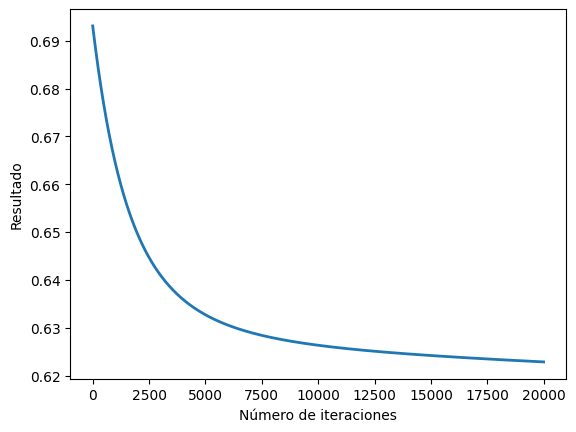

In [16]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha_reg = 0.001
num_iters = 20000
lambda_reg = 0.01

# Inicializa theta_reg y ejecuta el descenso por el gradiente
theta_reg = np.zeros(12)
theta_reg, J_history_reg = descensoGradienteReg(theta_reg, X_ready_reg, y_train_reg, alpha_reg, num_iters, lambda_reg)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente: {:s}'.format(str(theta_reg)))
print('=' * 100)
#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_history_reg[-1]} ")



print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado de los partidos
plt.plot(np.arange(len(J_history_reg)), J_history_reg, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')

Realizando algunas pruebas de que el equipo gana o no en un partido de local.

In [17]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array_reg = [1, 17230, 1,	153, 115.0,	120,	80,	3,	3,	0,	0,	1]
resuldato = sigmoid(np.dot(X_array_reg, theta_reg))   # Se debe cambiar esto

print(f"Una persona con los siguientes datos: {X_array_reg}")
print('La persona tiene una probabilidad de que tenga la enfermendad cardiovascular de: {:.0f}'.format(resuldato))

Una persona con los siguientes datos: [1, 17230, 1, 153, 115.0, 120, 80, 3, 3, 0, 0, 1]
La persona tiene una probabilidad de que tenga la enfermendad cardiovascular de: 1


## Validaciones con datos de prueba

Para las validaciones correspondientes se hizo el uso del 80% y 20%, donde el 80% son para el entrenamiento y el 20% para la fase de prueba.

In [18]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm_reg = (X_test_reg - mu_reg) / sigma_reg
m_test = len(X_test_reg)

In [19]:
X_test_ready_reg = np.concatenate([np.ones((m_test, 1)), X_test_norm_reg], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready_reg)

[[ 1.          0.38416105  1.36417608 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.         -0.27298772  1.36417608 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.         -0.70527979 -0.7330432  ... -0.31186032 -0.23863407
   0.49497815]
 ...
 [ 1.          0.37565296  1.36417608 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.          0.9063958  -0.7330432  ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.          1.62229092  1.36417608 ... -0.31186032 -0.23863407
  -2.0202912 ]]


In [22]:
# inicializamos nuestra y_predicha_reg donde almacenaremos nuestras y predichas
y_predicha_reg = []

# calculamos la Y predicha de cada fila de X_test_ready_reg
for i in X_test_ready_reg:
  y_predicha_reg.append(sigmoid(np.dot(i, theta_reg)))


y_predicha_reg = np.array(y_predicha_reg)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral_reg = (y_predicha_reg >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}".format(
    'X[:, 0]','X[:, 1]','X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]','X[:, 7]','X[:, 8]','X[:, 9]',
    'X[:, 10]','X[:, 11]', ' Y_predicha', 'Y_umbral', ' Y_test'
))

print("=" * 175)

for i in range(30):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_test_ready_reg[i, 0], X_test_ready_reg[i, 1], X_test_ready_reg[i, 2], X_test_ready_reg[i, 3], X_test_ready_reg[i, 4], X_test_ready_reg[i, 5], X_test_ready_reg[i, 6],
        X_test_ready_reg[i, 7], X_test_ready_reg[i, 8], X_test_ready_reg[i, 9], X_test_ready_reg[i, 10], X_test_ready_reg[i, 11],
        y_predicha_reg[i], y_umbral_reg[i], y_test_reg.iloc[i]
))



 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11] Y_predicha  Y_umbral    Y_test
   1.000   0.384     1.364     1.783   0.473  -0.060  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.499     0.000     1.000
   1.000  -0.273     1.364     1.052   0.821   0.009  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.477     0.000     1.000
   1.000  -0.705    -0.733    -0.897  -0.014  -0.060  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.378     0.000     0.000
   1.000   1.247    -0.733     4.097   0.404   0.078  -0.035  -0.538 1.354    -0.312    -0.239     0.495     0.526     1.000     1.000
   1.000  -1.388     1.364     0.687   0.480  -0.060  -0.035  -0.538-0.395    -0.312    -0.239     0.495     0.338     0.000     1.000
   1.000   1.073     1.364    -1.262  -1.266  -0.060  -0.094  -0.538-0.395    -0.312    -0.239     0.495     0.480     0.000     1.000
   1.000   1.468    -0.733    -0.410  -1.335  -0.198 

### Calculamos que tal de precición tiene los datos de entrenamiento

Calculamos con el metodo np.mean, la media(promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [23]:
# Mostramos la precición de entrenamiento
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral_reg == y_test_reg) * 100))

Precición de entrenamiento: 65.26 % 


# Conclusión

## Resultados

Al concluir con los resultados del modelo de regresión logística se pudo observar que con la regularización se mejoró las pruebas con una pequeña diferencia en la parte de la presición que fue 65% con la regularización y 62% para la normal sin regularización.

Pero como resultado la mejor experiencia fue aplicar la regularización para un buen entrenamiento.